# Identifying Modes of Predictability: 
Katie Brennan  
November 2021  


In [1]:
import sys
import numpy as np
import pickle

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

In [2]:
sys.path.append("/home/disk/p/mkb22/Documents/si_analysis_kb/LIMs/SI_LIMs/")
import run_forecast_model_data as rf
import LIM_utils_kb as limkb
import LIM_stats_kb as kbstats
import LIM_building as limbuild

In [3]:
import importlib
importlib.reload(rf)

<module 'run_forecast_model_data' from '/home/disk/p/mkb22/Documents/si_analysis_kb/LIMs/SI_LIMs/run_forecast_model_data.py'>

In [4]:
data_dir = '/home/disk/kalman2/mkb22/SI_LIMs/sensitivity_testing/neofs/last_millennium/'
data_name = 'LIMcast_cesm_lme_002_ntrain_850_1650_validyrs_1651_1850_tas50_psl50_zg50_tos50_sit50_sic50_20211113.pkl'

lim_data = pickle.load(open(data_dir+data_name, "rb" ) )

In [5]:
lim_data.keys()

dict_keys(['LIMd', 'forecast', 'forecast_validation', 'forecast_validation_lags', 'ar1cast', 'ar1cast_lags'])

In [6]:
lim_data['LIMd'].keys()

dict_keys(['vec', 'veci', 'val', 'lam_L', 'Gt', 'lam_L_adj', 'npos_eigenvalues', 'E3', 'W_all', 'standard_factor', 'E3_all', 'E_sic', 'var_dict', 'P_train', 'exp_setup', 'frac_neg_eigenvals'])

In [7]:
lim_data['LIMd']['vec'].shape

(300, 300)

Pieces of LIMd being used in rf.run_forecast():   
* LIMd['E3']  
* LIMd['limvars']  
* LIMd['ntrunc']  
* LIMd['standard_factor']  
* LIMd['W_all']  
  
Pieced used in above but actual forecast: 
* LIMd['frac_neg_eigenvals']
* LIMd['lam_L']
* LIMd['lam_L_adj']
* LIMd['vec']

In [ ]:
Gt_test = np.matmul(np.matmul(lim_data['LIMd']['vec'],np.diag(np.exp(lim_data['LIMd']['lam_L']*1))),lim_data['LIMd']['veci'])

np.allclose(lim_data['LIMd']['Gt'],Gt_test,atol=1e-5)

In [ ]:
train_dsource = lim_data['LIMd']['exp_setup']['train_dsource']
master_save=False
save_decomp=False

if 'hist_ssp585' in train_dsource: 
    folder_add = 'hist_ssp585_concatenated/'
elif 'hist' in train_dsource: 
    folder_add = 'historical/'
elif 'lm' in train_dsource: 
    folder_add = 'last_millennium/'
elif 'satellite' in train_dsource: 
    folder_add = 'satellite/'
elif 'era5' in train_dsource: 
    folder_add = 'reanalysis/'
elif 'lme' in train_dsource: 
    folder_add = 'last_millennium/'

save_folder = '/home/disk/kalman2/mkb22/SI_LIMs/sensitivity_testing/enm_analysis/'+folder_add

n = 0
Nenms = len(lim_data['LIMd']['exp_setup']['limvars'])*70
exp_setup = lim_data['LIMd']['exp_setup']

LIMd_smode = {}
LIMd_smode['E3'] = lim_data['LIMd']['E3']
LIMd_smode['E3_all'] = lim_data['LIMd']['E3_all']
LIMd_smode['E_sic'] = lim_data['LIMd']['E_sic']
LIMd_smode['var_dict'] = lim_data['LIMd']['var_dict']
LIMd_smode['standard_factor'] = lim_data['LIMd']['standard_factor']
LIMd_smode['W_all'] = lim_data['LIMd']['W_all']
LIMd_smode['vec'] = lim_data['LIMd']['vec']
LIMd_smode['veci'] = lim_data['LIMd']['veci']

LIMd_smode['lam_L'] = np.zeros(Nenms)
LIMd_smode['lam_L'][n] = lim_data['LIMd']['lam_L'][n]

In [ ]:
n = 0
Nenms = len(lim_data['LIMd']['exp_setup']['limvars'])*50
exp_setup = lim_data['LIMd']['exp_setup']

LIMd_smode = {}
LIMd_smode['E3'] = lim_data['LIMd']['E3']
LIMd_smode['E3_all'] = lim_data['LIMd']['E3_all']
LIMd_smode['E_sic'] = lim_data['LIMd']['E_sic']
LIMd_smode['var_dict'] = lim_data['LIMd']['var_dict']
LIMd_smode['standard_factor'] = lim_data['LIMd']['standard_factor']
LIMd_smode['W_all'] = lim_data['LIMd']['W_all']
LIMd_smode['vec'] = lim_data['LIMd']['vec']
LIMd_smode['veci'] = lim_data['LIMd']['veci']
LIMd_smode['lam_L'] = lim_data['LIMd']['lam_L']

In [ ]:
for n in range(10): 
    lim_data = pickle.load(open(data_dir+data_name, "rb" ) )
    
    LIMd_smode['vec'] = lim_data['LIMd']['vec']
    LIMd_smode['veci'] = lim_data['LIMd']['veci']
    LIMd_smode['lam_L'] = lim_data['LIMd']['lam_L']
    
    LIMd_smode['vec'][:,n] = np.zeros((Nenms))
    LIMd_smode['veci'][n,:] = np.zeros((Nenms))
    LIMd_smode['lam_L'][n] = 0

In [ ]:
#--------------------------------------------------
### Run Forecast: 
#--------------------------------------------------

forecast = rf.run_forecast(LIMd_smode,exp_setup, save_folder, verbose=True, save=master_save, save_decomp=False)

In [ ]:
forecast_validation = rf.validate_forecast_monthly(forecast, exp_setup['limvars'], 1, exp_setup, LIMd_smode, 
                                                   save_folder, iplot=False, save=master_save)

In [ ]:
forecast_validation_lags = rf.validate_forecast_lagged(forecast, exp_setup['limvars'], exp_setup, LIMd_smode, 
                                                       save_folder, iplot=False, save=master_save, 
                                                       detrend_truth=True)

In [ ]:
from datetime import date

today = date.today()

In [ ]:
#--------------------------------------------------
### Save experiment: 
#--------------------------------------------------

today_date = today.strftime("%Y%m%d")
LIMcast = {}

LIMcast['LIMd'] = LIMd_smode
LIMcast['forecast'] = forecast
LIMcast['forecast_validation'] = forecast_validation
LIMcast['forecast_validation_lags'] = forecast_validation_lags\

if save_decomp is False: 
    if 'x_forecast_dcomp' in LIMcast['forecast'].keys():
        LIMcast['forecast'].pop('x_forecast_dcomp')

start_yr = str(forecast['var_dict_valid']['sic']['time'][0])[0:4]
end_yr = str(forecast['var_dict_valid']['sic']['time'][-1])[0:4]

filename_end = (exp_setup['train_dsource']+'_002_ntrain'+exp_setup['mod_filename'][-22:-13]+
                '_validyrs_'+start_yr+'_'+end_yr+'_'+
                (str(exp_setup['ntrunc'])+"_").join(exp_setup['limvars'])+
                str(exp_setup['nmodes_sic'])+'_'+today_date+'.pkl')

print('saving in: '+save_folder+'LIMcast_mode'+str(n)+'_'+filename_end)
#pickle.dump(LIMcast, open(save_folder+'LIMcast_'+filename_end, "wb" ) )

In [267]:
exp_setup['Weight']

True

In [4]:
import time as timestamp 

In [9]:
begin_time = timestamp.time()

data_dir = '/home/disk/kalman2/mkb22/SI_LIMs/sensitivity_testing/neofs/last_millennium/'
data_name = 'LIMcast_cesm_lme_002_ntrain_850_1650_validyrs_1651_1850_tas50_psl50_zg50_tos50_sit50_sic50_20211113.pkl'

lim_data = pickle.load(open(data_dir+data_name, "rb" ) )

train_dsource = lim_data['LIMd']['exp_setup']['train_dsource']
master_save=False
save_decomp=False

if 'hist_ssp585' in train_dsource: 
    folder_add = 'hist_ssp585_concatenated/'
elif 'hist' in train_dsource: 
    folder_add = 'historical/'
elif 'lm' in train_dsource: 
    folder_add = 'last_millennium/'
elif 'satellite' in train_dsource: 
    folder_add = 'satellite/'
elif 'era5' in train_dsource: 
    folder_add = 'reanalysis/'
elif 'lme' in train_dsource: 
    folder_add = 'last_millennium/'

save_folder = '/home/disk/kalman2/mkb22/SI_LIMs/sensitivity_testing/enm_analysis/'+folder_add

n = 0
Nenms = len(lim_data['LIMd']['exp_setup']['limvars'])*50
exp_setup = lim_data['LIMd']['exp_setup']

LIMd_smode = lim_data['LIMd']
#LIMd_smode = {}
# LIMd_smode['E3'] = lim_data['LIMd']['E3']
# LIMd_smode['E3_all'] = lim_data['LIMd']['E3_all']
# LIMd_smode['E_sic'] = lim_data['LIMd']['E_sic']
# LIMd_smode['var_dict'] = lim_data['LIMd']['var_dict']
# LIMd_smode['standard_factor'] = lim_data['LIMd']['standard_factor']
# LIMd_smode['W_all'] = lim_data['LIMd']['W_all']
# LIMd_smode['vec'] = lim_data['LIMd']['vec']
# LIMd_smode['veci'] = lim_data['LIMd']['veci']
# LIMd_smode['lam_L'] = lim_data['LIMd']['lam_L']
# LIMd_smode['lam_L_adj'] = lim_data['LIMd']['lam_L_adj']

#--------------------------------------------------
### Run Forecast: 
#--------------------------------------------------

forecast = rf.run_forecast(LIMd_smode,exp_setup, save_folder, verbose=True, save=master_save, save_decomp=False)

# forecast_validation = rf.validate_forecast_monthly(forecast, exp_setup['limvars'], 1, exp_setup, LIMd_smode, 
#                                                    save_folder, iplot=False, save=master_save)

forecast_validation_lags = rf.validate_forecast_lagged(forecast, exp_setup['limvars'], exp_setup, LIMd_smode, 
                                                       save_folder, iplot=False, save=master_save, 
                                                       detrend_truth=True)

elapsed_time = timestamp.time() - begin_time
print('-----------------------------------------------------')
print('completed in ' + str(elapsed_time) + ' seconds')
print('-----------------------------------------------------')

Validation data: cesm_lme
tecut = 1001, tscut = 801.0
Loading from tas
Loading from a/LME/LIMs/tas_sfc_Amon_CESM_LMEallforc_002_085001-200512.nc
time dimension: 1651 - 1850
detrending...
Working on month...0
Working on month...1
Working on month...2
Working on month...3
Working on month...4
Working on month...5
Working on month...6
Working on month...7
Working on month...8
Working on month...9
Working on month...10
Working on month...11
latitude cutoff detected: 50
-----------------------------------------------------
completed in 11.237840414047241 seconds
-----------------------------------------------------
Validation shape: (3168, 2400)
time dimension: 1651 - 1850
(2400,)
tecut = 1001, tscut = 801.0
Loading from psl
Loading from a/LME/LIMs/psl_sfc_Amon_CESM_LMEallforc_002_085001-200512.nc
time dimension: 1651 - 1850
detrending...
Working on month...0
Working on month...1
Working on month...2
Working on month...3
Working on month...4
Working on month...5
Working on month...6
Working

Lag 5
Trained using all months...
Truth_anom shape: (3168, 2395)
Forecast_anom shape: (3168, 2395)
changing cellarea units from m^2 to km^2
Lag 6
Trained using all months...
Truth_anom shape: (3168, 2394)
Forecast_anom shape: (3168, 2394)
changing cellarea units from m^2 to km^2
Lag 7
Trained using all months...
Truth_anom shape: (3168, 2393)
Forecast_anom shape: (3168, 2393)
changing cellarea units from m^2 to km^2
Lag 8
Trained using all months...
Truth_anom shape: (3168, 2392)
Forecast_anom shape: (3168, 2392)
changing cellarea units from m^2 to km^2
tecut = 1001, tscut = 801.0
Loading from psl
Loading from a/LME/LIMs/psl_sfc_Amon_CESM_LMEallforc_002_085001-200512.nc
time dimension: 1651 - 1850
detrending...
Working on month...0
Working on month...1
Working on month...2
Working on month...3
Working on month...4
Working on month...5
Working on month...6
Working on month...7
Working on month...8
Working on month...9
Working on month...10
Working on month...11
latitude cutoff detected:

Truth_anom shape: (25600, 2400)
Forecast_anom shape: (25600, 2400)
changing cellarea units from m^2 to km^2
Lag 1
Trained using all months...
Truth_anom shape: (25600, 2399)
Forecast_anom shape: (25600, 2399)
changing cellarea units from m^2 to km^2
Lag 2
Trained using all months...
Truth_anom shape: (25600, 2398)
Forecast_anom shape: (25600, 2398)
changing cellarea units from m^2 to km^2
Lag 3
Trained using all months...
Truth_anom shape: (25600, 2397)
Forecast_anom shape: (25600, 2397)
changing cellarea units from m^2 to km^2
Lag 4
Trained using all months...
Truth_anom shape: (25600, 2396)
Forecast_anom shape: (25600, 2396)
changing cellarea units from m^2 to km^2
Lag 5
Trained using all months...
Truth_anom shape: (25600, 2395)
Forecast_anom shape: (25600, 2395)
changing cellarea units from m^2 to km^2
Lag 6
Trained using all months...
Truth_anom shape: (25600, 2394)
Forecast_anom shape: (25600, 2394)
changing cellarea units from m^2 to km^2
Lag 7
Trained using all months...
Truth_

In [11]:
forecast.keys()

dict_keys(['P_train_valid', 'exp_setup', 'var_dict_valid', 'x_forecast', 'x_forecast_dcomp'])

In [16]:
%run sing_enm_test_113021.py

Validation data: cesm_lme
tecut = 1001, tscut = 801.0
Loading from tas
Loading from a/LME/LIMs/tas_sfc_Amon_CESM_LMEallforc_002_085001-200512.nc
time dimension: 1651 - 1850
detrending...
Working on month...0
Working on month...1
Working on month...2
Working on month...3
Working on month...4
Working on month...5
Working on month...6
Working on month...7
Working on month...8
Working on month...9
Working on month...10
Working on month...11
latitude cutoff detected: 50
-----------------------------------------------------
completed in 11.14580488204956 seconds
-----------------------------------------------------
Validation shape: (3168, 2400)
time dimension: 1651 - 1850
(2400,)
tecut = 1001, tscut = 801.0
Loading from psl
Loading from a/LME/LIMs/psl_sfc_Amon_CESM_LMEallforc_002_085001-200512.nc
time dimension: 1651 - 1850
detrending...
Working on month...0
Working on month...1
Working on month...2
Working on month...3
Working on month...4
Working on month...5
Working on month...6
Working 

Lag 5
Trained using all months...
Truth_anom shape: (3168, 2395)
Forecast_anom shape: (3168, 2395)
changing cellarea units from m^2 to km^2
Lag 6
Trained using all months...
Truth_anom shape: (3168, 2394)
Forecast_anom shape: (3168, 2394)
changing cellarea units from m^2 to km^2
Lag 7
Trained using all months...
Truth_anom shape: (3168, 2393)
Forecast_anom shape: (3168, 2393)
changing cellarea units from m^2 to km^2
Lag 8
Trained using all months...
Truth_anom shape: (3168, 2392)
Forecast_anom shape: (3168, 2392)
changing cellarea units from m^2 to km^2
tecut = 1001, tscut = 801.0
Loading from psl
Loading from a/LME/LIMs/psl_sfc_Amon_CESM_LMEallforc_002_085001-200512.nc
time dimension: 1651 - 1850
detrending...
Working on month...0
Working on month...1
Working on month...2
Working on month...3
Working on month...4
Working on month...5
Working on month...6
Working on month...7
Working on month...8
Working on month...9
Working on month...10
Working on month...11
latitude cutoff detected:

Truth_anom shape: (25600, 2400)
Forecast_anom shape: (25600, 2400)
changing cellarea units from m^2 to km^2
Lag 1
Trained using all months...
Truth_anom shape: (25600, 2399)
Forecast_anom shape: (25600, 2399)
changing cellarea units from m^2 to km^2
Lag 2
Trained using all months...
Truth_anom shape: (25600, 2398)
Forecast_anom shape: (25600, 2398)
changing cellarea units from m^2 to km^2
Lag 3
Trained using all months...
Truth_anom shape: (25600, 2397)
Forecast_anom shape: (25600, 2397)
changing cellarea units from m^2 to km^2
Lag 4
Trained using all months...
Truth_anom shape: (25600, 2396)
Forecast_anom shape: (25600, 2396)
changing cellarea units from m^2 to km^2
Lag 5
Trained using all months...
Truth_anom shape: (25600, 2395)
Forecast_anom shape: (25600, 2395)
changing cellarea units from m^2 to km^2
Lag 6
Trained using all months...
Truth_anom shape: (25600, 2394)
Forecast_anom shape: (25600, 2394)
changing cellarea units from m^2 to km^2
Lag 7
Trained using all months...
Truth_

## Load previously run forecast: 

In [6]:
data_dir = '/home/disk/kalman2/mkb22/SI_LIMs/sensitivity_testing/neofs/last_millennium/'
filename2 = ('LIMcast_cesm_lme_002_ntrain_850_1650_validyrs_1651_1850_'+
             'tas50_psl50_zg50_tos50_sit50_sic50_20211113_2.pkl')
    
experiment_all = pickle.load(open(data_dir+filename2, 'rb'))

forecast_og = experiment_all['forecast']
LIMd_og = experiment_all['LIMd']
exp_setup_og = LIMd_og['exp_setup']

### Comparison OG vs re-run: 

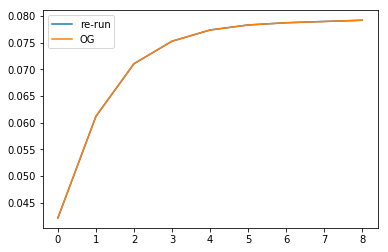

In [8]:
# After bug work:
plt.plot(forecast_validation_lags['validation_stats_lags']['sic']['gm_rmse'], label='re-run')
plt.plot(experiment_all['forecast_validation_lags']['validation_stats_lags']['sic']['gm_rmse'], label='OG')
plt.legend()

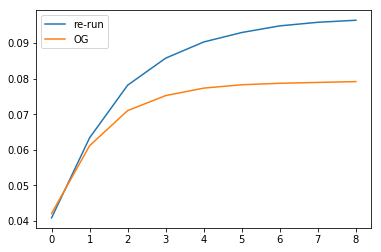

In [7]:
# Before bug work:
plt.plot(forecast_validation_lags['validation_stats_lags']['sic']['gm_rmse']-8, label='re-run')
plt.plot(experiment_all['forecast_validation_lags']['validation_stats_lags']['sic']['gm_rmse'], label='OG')
plt.legend()

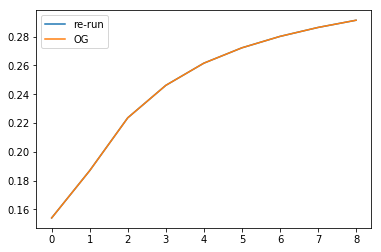

In [51]:
plt.plot(forecast_validation_lags['validation_stats_lags']['sit']['gm_rmse'], label='re-run')
plt.plot(experiment_all['forecast_validation_lags']['validation_stats_lags']['sit']['gm_rmse'], label='OG')
plt.legend()

In [8]:
np.allclose(forecast_og['x_forecast'],forecast['x_forecast'])

True

In [9]:
lag = 1
if len(exp_setup_og['limvars'])<=1:
    x_forecast_dcomp_og = np.zeros((len(exp_setup_og['lags']),LIMd_og['E_sic'].shape[0],
                                    forecast_og['x_forecast'].shape[2]))
    nmodes = 0
else: 
    x_forecast_dcomp_og = np.zeros((len(exp_setup_og['lags']),LIMd_og['E3_all'].shape[0]+LIMd_og['E_sic'].shape[0],
                                   forecast_og['x_forecast'].shape[2]))
    nmodes = LIMd_og['E3_all'].shape[1]

print('Decompressing forecasted fields out of eof space.')
print('Working on...')

for i,lag in enumerate(exp_setup_og['lags']):
    print('Lag '+ str(lag))
    x_forecast_dcomp_og[lag,:,:] = limkb.decompress_eof_separate_sic(forecast_og['x_forecast'][lag,:,:],
                                                                     nmodes,exp_setup_og['nmodes_sic'],LIMd_og['E3_all'],
                                                                      LIMd_og['E_sic'],exp_setup_og['limvars'],
                                                                      LIMd_og['var_dict'],LIMd_og['W_all'],
                                                                      Weights=exp_setup_og['Weight'],
                                                                      sic_separate=exp_setup_og['sic_separate'])

Decompressing forecasted fields out of eof space.
Working on...
Lag 0
Lag 1
Lag 2
Lag 3
Lag 4
Lag 5
Lag 6
Lag 7
Lag 8


In [10]:
var = 'tos'
og_inds = LIMd_og['var_dict'][var]['var_inds']
for_inds = forecast['var_dict_valid'][var]['var_inds']

np.allclose(x_forecast_dcomp_og[1,og_inds,:],forecast['x_forecast_dcomp'][1,for_inds,:])

False

In [11]:
l = 1

for_nans = np.isnan(forecast['x_forecast_dcomp'][l,:,:])
og_nans = np.isnan(x_forecast_dcomp_og[l,:,:])

for_fin = np.isfinite(forecast['x_forecast_dcomp'][l,:,:])
og_fin = np.isfinite(x_forecast_dcomp_og[l,:,:])

for_inf = np.isinf(forecast['x_forecast_dcomp'][l,:,:])
og_inf = np.isinf(x_forecast_dcomp_og[l,:,:])
og_zeros = np.isclose(x_forecast_dcomp_og[l,:,:],0,atol=1e-8)

np.allclose(for_fin, og_fin)

True

In [14]:
np.allclose(for_inf, og_inf)

True

In [44]:
var = 'sit'
og_inds = LIMd_og['var_dict'][var]['var_inds']
for_inds = forecast['var_dict_valid'][var]['var_inds']

forecast_og_var = x_forecast_dcomp_og[1,og_inds,:]
forecast_var = forecast['x_forecast_dcomp'][1,for_inds,:]

inds_diff = np.logical_not(np.isclose(forecast_og_var,forecast_var, atol=1e-8))

In [45]:
forecast_og_var[inds_diff], forecast_var[inds_diff]

(array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]))

In [46]:
var_ind_fin_og = np.logical_not(np.isnan(forecast_og_var))
var_ind_fin = np.logical_not(np.isnan(forecast_var))

In [47]:
np.allclose(forecast_og_var[var_ind_fin_og],forecast_var[var_ind_fin])

True

# Summary: 
  
The decomposed forecasts are not the same because they contain nans and np.allclose() does not let nans be equal. Perhaps the handling of nans is different in the validation statistics portion of the code. 

## Validation: 

In [52]:
fdic_train = limkb.build_training_dic(exp_setup['train_dsource'])
fdic_valid = limkb.build_training_dic(exp_setup['valid_dsource'])

areacell, areacell_dict = limbuild.load_areacell_dict(fdic_train, lat_cutoff=exp_setup['lat_cutoff'],
                                                      remove_climo=False, detrend=False, verbose=False )
full_names, areawt_name, month_names = limbuild.load_full_names()

v = {}
validation_stats_lags_og = {}

Loading from cuments/SeaIceData/LME/LIMs/areacella_CESM_LME_global_001.nc
latitude cutoff detected: 50
Loading from 2/Documents/SeaIceData/LME/LIMs/areacello_CESM_LME_nh_001.nc
latitude cutoff detected: 50


In [67]:
for k, var in enumerate(['sic']):
    tecut = int(exp_setup_og['nyears_startvalid']/12)+(exp_setup_og['nyearsvalid'])
#        tecut = exp_setup['nyearstot'] - (int(exp_setup['nyears_startvalid']/12)+(exp_setup['nyearsvalid']))

    if tecut <=0: 
        tecut = False
    print('tecut = '+str(tecut) +', tscut = '+str(exp_setup_og['nyears_startvalid']/12))

    X_var, _ = limkb.load_data(var, v, fdic_valid, remove_climo=True, detrend=True, verbose=True,
                               tscut=int(exp_setup_og['nyears_startvalid']/12), tecut=tecut, 
                               lat_cutoff=exp_setup_og['lat_cutoff'])

    if 'sic' in var:
        if np.nanmax(X_var)>1.1:
            print('Changing units of sic be a between 0 to 1')
            X_var = X_var/100

    corr_tot = np.zeros((len(exp_setup_og['lags'])))
    ce_tot = np.zeros((len(exp_setup_og['lags'])))
    gm_rmse = np.zeros((len(exp_setup_og['lags'])))
    gsum_rmse = np.zeros((len(exp_setup_og['lags'])))
    rmse = np.zeros((X_var.shape[0],len(exp_setup_og['lags'])))
    valid_stats = {}

    for i,lag in enumerate(exp_setup_og['lags']):
        print('Lag '+str(lag))
#             [truth_anom, forecast_anom] = limbuild.gather_truth_forecast2(lag,var,exp_setup['mo'],X_var,
#                                                                           forecast['x_forecast_dcomp'],
#                                                                           exp_setup['nyearsvalid']*12,
#                                                                           LIMd['var_dict'],exp_setup['ntrain'],
#                                                                           exp_setup['nyears_startvalid'],
#                                                                           insamp=exp_setup['Insamp'])
        [truth_anom, 
         forecast_anom] = limbuild.gather_truth_forecast_notime(lag,var,exp_setup_og['mo'],X_var,
                                                                x_forecast_dcomp_og,
                                                                LIMd_og['var_dict'],insamp=exp_setup['Insamp'])
    
#         if 'sic' in var:
#             if np.nanmax(truth_anom)>2.0:
#                 print('Max truth concentration anomalies is '+str(np.round(np.nanmax(truth_anom),2))+
#                       ' ...dividing concentration by 100.')
#                 truth_anom_check = truth_anom/100.0
#             else: 
#                 truth_anom_check = truth_anom 
                
#             if np.nanmax(forecast_anom)>2.0:
#                 print('Max forecast concentration anomalies is '+str(np.round(np.nanmax(truth_anom),2))+
#                       ' ...dividing concentration by 100.')
#                 forecast_anom_check = forecast_anom/100.0
#             else: 
#                 forecast_anom_check = forecast_anom 


        print('Truth_anom shape: '+str(truth_anom.shape))
        print('Forecast_anom shape: '+str(forecast_anom.shape))

        [corr_tot[i], ce_tot[i],  gm_rmse[i], gsum_rmse[i], 
         rmse[:,i]] = limbuild.calc_validataion_stats(var, truth_anom, forecast_anom, LIMd_og['var_dict'],
                                                      areacell,areacell_dict,
                                                      areawt_name,LIMd_og,iplot=False)

    valid_stats['corr_tot'] = corr_tot
    valid_stats['ce_tot'] = ce_tot
    valid_stats['gm_rmse'] = gm_rmse
    valid_stats['gsum_rmse'] = gsum_rmse
    valid_stats['rmse'] = rmse

    validation_stats_lags_og[var] = valid_stats

    del X_var

forecast_validation_lags_og = {}
forecast_validation_lags_og['validation_stats_lags'] = validation_stats_lags_og
forecast_validation_lags_og['exp_setup'] = exp_setup_og

tecut = 1001, tscut = 801.0
Loading from sic
Loading from aIceData/LME/LIMs/sic_SImon_CESM_LME_nh_002_085001-200512.nc
time dimension: 1651 - 1850
detrending...
Working on month...0
Found with nans (not in satellite), going to fill with zeros...
Working on month...1
Found with nans (not in satellite), going to fill with zeros...
Working on month...2
Found with nans (not in satellite), going to fill with zeros...
Working on month...3
Found with nans (not in satellite), going to fill with zeros...
Working on month...4
Found with nans (not in satellite), going to fill with zeros...
Working on month...5
Found with nans (not in satellite), going to fill with zeros...
Working on month...6
Found with nans (not in satellite), going to fill with zeros...
Working on month...7
Found with nans (not in satellite), going to fill with zeros...
Working on month...8
Found with nans (not in satellite), going to fill with zeros...
Working on month...9
Found with nans (not in satellite), going to fill wit

In [65]:
forecast_validation_lags_og['validation_stats_lags']['sic']['gm_rmse']

array([0.04211275, 0.06117351, 0.07103451, 0.07525445, 0.07735421,
       0.07829642, 0.0787116 , 0.07895265, 0.07918203])

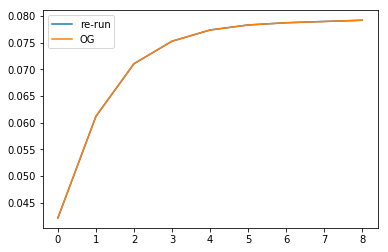

In [69]:
plt.plot(forecast_validation_lags_og['validation_stats_lags']['sic']['gm_rmse'], label='re-run')
plt.plot(experiment_all['forecast_validation_lags']['validation_stats_lags']['sic']['gm_rmse'], label='OG')
plt.legend()

In [62]:
np.nanmax(truth_anom)

97.17516306748291

In [63]:
np.nanmax(forecast_anom)

0.6290929467782466

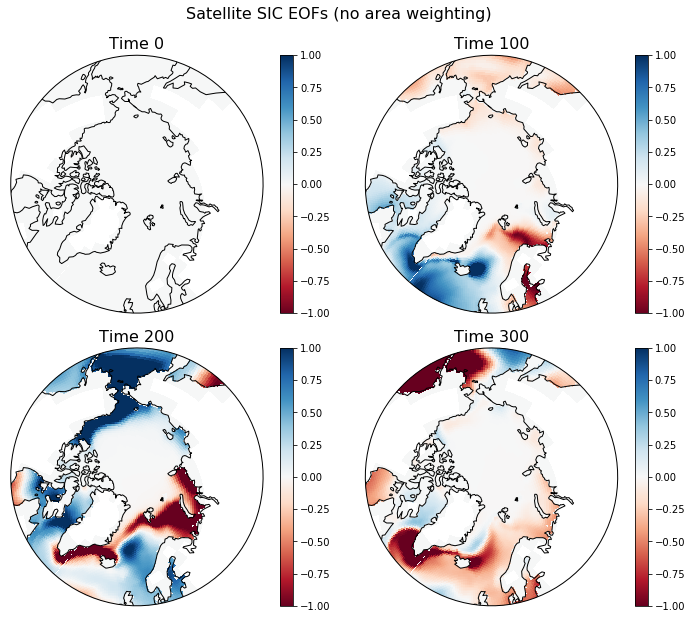

In [140]:
fig, axs = plt.subplots(2,2,figsize=(10,9),subplot_kw={'projection': ccrs.NorthPolarStereo()})
ax = axs.flatten()
fig.subplots_adjust(bottom=0.05, top=0.95,
                    left=0.04, right=0.95, wspace=0.02)

for i,mode in enumerate(modes):
    ax[i].set_title('Time '+str(mode), fontsize=16)
    ax[i].coastlines()
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax[i].set_boundary(circle, transform=ax[i].transAxes)
    ax[i].set_extent([-180, 180, 55, 90], ccrs.PlateCarree())
    
#    m = np.max(np.abs(eof_3d[(trunc_data['var_dict'][var]['lat']>0),mode]))
    cf = ax[i].pcolormesh(LIMd_smode['var_dict'][var]['lon'],#*lat_mask, #[:,:,0],
                          LIMd_smode['var_dict'][var]['lat'],#*lat_mask, #[:,:,0],
                          np.reshape(x_forecast_dcomp_og[l,og_inds,mode],(80,320)),
                          cmap='RdBu', 
                          transform=ccrs.PlateCarree(),vmin=-1,vmax=1)
    fig.colorbar(cf, ax=ax[i])
    
plt.suptitle('Satellite SIC EOFs (no area weighting)', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

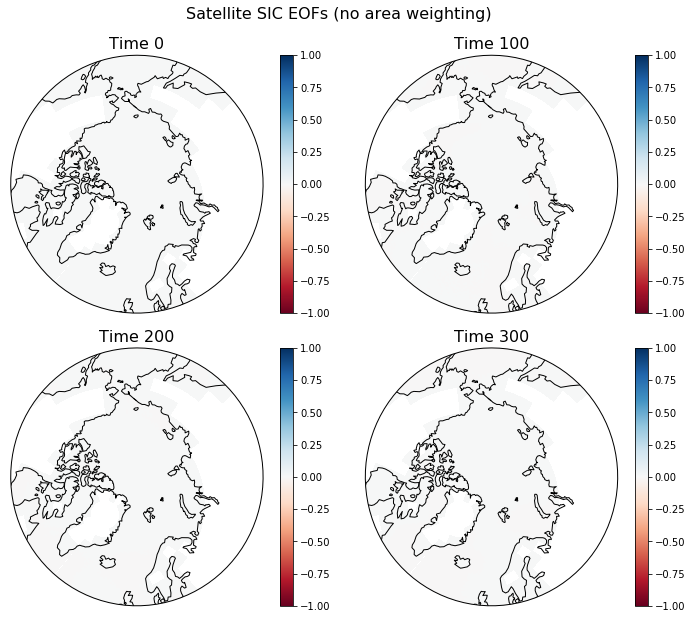

In [141]:
fig, axs = plt.subplots(2,2,figsize=(10,9),subplot_kw={'projection': ccrs.NorthPolarStereo()})
ax = axs.flatten()
fig.subplots_adjust(bottom=0.05, top=0.95,
                    left=0.04, right=0.95, wspace=0.02)

for i,mode in enumerate(modes):
    ax[i].set_title('Time '+str(mode), fontsize=16)
    ax[i].coastlines()
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax[i].set_boundary(circle, transform=ax[i].transAxes)
    ax[i].set_extent([-180, 180, 55, 90], ccrs.PlateCarree())
    
#    m = np.max(np.abs(eof_3d[(trunc_data['var_dict'][var]['lat']>0),mode]))
    cf = ax[i].pcolormesh(LIMd_smode['var_dict'][var]['lon'],#*lat_mask, #[:,:,0],
                          LIMd_smode['var_dict'][var]['lat'],#*lat_mask, #[:,:,0],
                          np.reshape(forecast['x_forecast_dcomp'][l,og_inds,mode],(80,320))-np.reshape(x_forecast_dcomp_og[l,og_inds,mode],(80,320)),
                          cmap='RdBu', 
                          transform=ccrs.PlateCarree(),vmin=-1,vmax=1)
    fig.colorbar(cf, ax=ax[i])
    
plt.suptitle('Satellite SIC EOFs (no area weighting)', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

### Validate: 

In [292]:
np.isinf(x_forecast_dcomp_og[1,:,:]).sum()

32703168

In [280]:
fdic_train = limkb.build_training_dic(exp_setup['train_dsource'])
fdic_valid = limkb.build_training_dic(exp_setup['valid_dsource'])

areacell, areacell_dict = limbuild.load_areacell_dict(fdic_train, lat_cutoff=exp_setup['lat_cutoff'],
                                                      remove_climo=False, detrend=False, verbose=False )
full_names, areawt_name, month_names = limbuild.load_full_names()

v = {}
validation_stats_lags_og = {}


Loading from cuments/SeaIceData/LME/LIMs/areacella_CESM_LME_global_001.nc
latitude cutoff detected: 50
Loading from 2/Documents/SeaIceData/LME/LIMs/areacello_CESM_LME_nh_001.nc
latitude cutoff detected: 50


In [281]:
for k, var in enumerate(exp_setup_og['limvars']):
    tecut = int(exp_setup_og['nyears_startvalid']/12)+(exp_setup_og['nyearsvalid'])
#        tecut = exp_setup['nyearstot'] - (int(exp_setup['nyears_startvalid']/12)+(exp_setup['nyearsvalid']))

    if tecut <=0: 
        tecut = False
    print('tecut = '+str(tecut) +', tscut = '+str(exp_setup_og['nyears_startvalid']/12))

    X_var, _ = limkb.load_data(var, v, fdic_valid, remove_climo=True, detrend=True, verbose=True,
                               tscut=int(exp_setup_og['nyears_startvalid']/12), tecut=tecut, 
                               lat_cutoff=exp_setup_og['lat_cutoff'])

    if var is 'sic':
        if np.nanmax(X_var)>1:
            print('Changing units of sic be a between 0 to 1')
            X_var = X_var/100

    corr_tot = np.zeros((len(exp_setup_og['lags'])))
    ce_tot = np.zeros((len(exp_setup_og['lags'])))
    gm_rmse = np.zeros((len(exp_setup_og['lags'])))
    gsum_rmse = np.zeros((len(exp_setup_og['lags'])))
    rmse = np.zeros((X_var.shape[0],len(exp_setup_og['lags'])))
    valid_stats = {}

    for i,lag in enumerate(exp_setup_og['lags']):
        print('Lag '+str(lag))
#             [truth_anom, forecast_anom] = limbuild.gather_truth_forecast2(lag,var,exp_setup['mo'],X_var,
#                                                                           forecast['x_forecast_dcomp'],
#                                                                           exp_setup['nyearsvalid']*12,
#                                                                           LIMd['var_dict'],exp_setup['ntrain'],
#                                                                           exp_setup['nyears_startvalid'],
#                                                                           insamp=exp_setup['Insamp'])
        [truth_anom, 
         forecast_anom] = limbuild.gather_truth_forecast_notime(lag,var,exp_setup_og['mo'],X_var,
                                                                x_forecast_dcomp_og,
                                                                LIMd_og['var_dict'],insamp=exp_setup['Insamp'])


        print('Truth_anom shape: '+str(truth_anom.shape))
        print('Forecast_anom shape: '+str(forecast_anom.shape))

        [corr_tot[i], ce_tot[i],  gm_rmse[i], gsum_rmse[i], 
         rmse[:,i]] = limbuild.calc_validataion_stats(var, truth_anom, forecast_anom, LIMd_og['var_dict'],
                                                      areacell,areacell_dict,
                                                      areawt_name,LIMd_og,iplot=False)

    valid_stats['corr_tot'] = corr_tot
    valid_stats['ce_tot'] = ce_tot
    valid_stats['gm_rmse'] = gm_rmse
    valid_stats['gsum_rmse'] = gsum_rmse
    valid_stats['rmse'] = rmse

    validation_stats_lags_og[var] = valid_stats

    del X_var

forecast_validation_lags_og = {}
forecast_validation_lags_og['validation_stats_lags'] = validation_stats_lags_og
forecast_validation_lags_og['exp_setup'] = exp_setup_og

tecut = 1001, tscut = 801.0
Loading from tas
Loading from a/LME/LIMs/tas_sfc_Amon_CESM_LMEallforc_002_085001-200512.nc
time dimension: 1651 - 1850
detrending...
Working on month...0
Working on month...1
Working on month...2
Working on month...3
Working on month...4
Working on month...5
Working on month...6
Working on month...7
Working on month...8
Working on month...9
Working on month...10
Working on month...11
latitude cutoff detected: 50
-----------------------------------------------------
completed in 11.157655477523804 seconds
-----------------------------------------------------
Lag 0
Trained using all months...
Truth_anom shape: (3168, 2400)
Forecast_anom shape: (3168, 2400)
changing cellarea units from m^2 to km^2
Lag 1
Trained using all months...
Truth_anom shape: (3168, 2399)
Forecast_anom shape: (3168, 2399)
changing cellarea units from m^2 to km^2
Lag 2
Trained using all months...
Truth_anom shape: (3168, 2398)
Forecast_anom shape: (3168, 2398)
changing cellarea units from 

tecut = 1001, tscut = 801.0
Loading from sit
Loading from aIceData/LME/LIMs/sit_SImon_CESM_LME_nh_002_085001-200512.nc
time dimension: 1651 - 1850
detrending...
Working on month...0
Found with nans (not in satellite), going to fill with zeros...
Working on month...1
Found with nans (not in satellite), going to fill with zeros...
Working on month...2
Found with nans (not in satellite), going to fill with zeros...
Working on month...3
Found with nans (not in satellite), going to fill with zeros...
Working on month...4
Found with nans (not in satellite), going to fill with zeros...
Working on month...5
Found with nans (not in satellite), going to fill with zeros...
Working on month...6
Found with nans (not in satellite), going to fill with zeros...
Working on month...7
Found with nans (not in satellite), going to fill with zeros...
Working on month...8
Found with nans (not in satellite), going to fill with zeros...
Working on month...9
Found with nans (not in satellite), going to fill wit

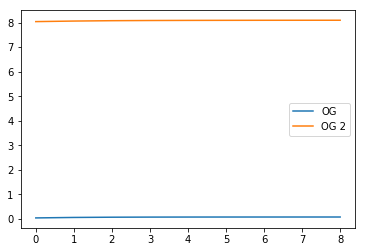

In [289]:
#plt.plot(forecast_validation_lags['validation_stats_lags']['sic']['gm_rmse'], label='re-run')
plt.plot(experiment_all['forecast_validation_lags']['validation_stats_lags']['sic']['gm_rmse'], label='OG')
plt.plot(forecast_validation_lags_og['validation_stats_lags']['sic']['gm_rmse'], label='OG 2')
plt.legend()

In [53]:
np.allclose(LIMd_og['E3_all'], LIMd_smode['E3_all'])

True

In [62]:
var = 'sic'

np.allclose(LIMd_og['W_all'][var], LIMd_smode['W_all'][var])

True

In [56]:
LIMd_og['W_all']['tas'].shape

(3168,)

In [66]:
exp_setup_og['sic_separate'], exp_setup['sic_separate']

(True, True)

In [52]:
np.allclose(LIMd_smode['P_train'], LIMd_og['P_train'])

True

In [46]:
LIMd_og.keys()

dict_keys(['vec', 'veci', 'val', 'lam_L', 'Gt', 'lam_L_adj', 'npos_eigenvalues', 'E3', 'W_all', 'standard_factor', 'E3_all', 'E_sic', 'var_dict', 'P_train', 'exp_setup', 'frac_neg_eigenvals'])

In [ ]:
lim_data2['forecast_validation_lags']['validation_stats_lags'].keys()

In [ ]:
np.allclose(lim_data['LIMd']['lam_L_adj'],lim_data2['LIMd']['lam_L_adj'])

In [ ]:
t = 1
Gt1 = np.matmul(np.matmul(lim_data['LIMd']['vec'],np.diag(np.exp(lim_data['LIMd']['lam_L_adj']*t))),lim_data['LIMd']['veci'])
Gt2 = np.matmul(np.matmul(lim_data2['LIMd']['vec'],np.diag(np.exp(lim_data2['LIMd']['lam_L_adj']*t))),lim_data2['LIMd']['veci'])

In [ ]:
np.allclose(Gt1,Gt2)

In [ ]:
np.allclose(lim_data2['forecast']['P_train_valid'],forecast['P_train_valid'])

In [ ]:
plt.plot(forecast['P_train_valid'][0,:])
plt.plot(forecast['P_train_valid'][51,:])
plt.plot(forecast['P_train_valid'][101,:])
plt.plot(forecast['P_train_valid'][251,:])

In [ ]:
2400/12

In [ ]:
LIMd = LIMd_smode
f_folder=save_folder
verbose=True
save=False
save_decomp=False

In [ ]:
exp_setup['limvars']

In [ ]:
fdic_valid = limkb.build_training_dic(exp_setup['valid_dsource'])
    
Ptrunc_valid = {}
var_dict_valid = {}
ntims = len(exp_setup['lags'])
print('Validation data: '+exp_setup['valid_dsource'])

for k, var in enumerate(['sic']): 
    tecut = int(exp_setup['nyears_startvalid']/12)+(exp_setup['nyearsvalid'])
#        tecut = exp_setup['nyearstot'] - (int(exp_setup['nyears_startvalid']/12)+(exp_setup['nyearsvalid']))

    print('tecut = '+str(tecut) +', tscut = '+str(exp_setup['nyears_startvalid']/12))

    X_var_valid, var_dict_valid = limkb.load_data(var, var_dict_valid, fdic_valid, 
                                                  remove_climo=exp_setup['remove_climo'], 
                                                  detrend=exp_setup['detrend'], verbose=verbose, 
                                                  tscut=int(exp_setup['nyears_startvalid']/12), 
                                                  tecut=tecut, lat_cutoff=exp_setup['lat_cutoff'])
    if var is 'sic':
        if np.nanmax(X_var_valid)>1:
            print('Changing units of sic be a between 0 to 1')
            X_var_valid = X_var_valid/100

    print('Validation shape: '+str(X_var_valid.shape))

    if 'datetime64' in str(type(var_dict_valid[var]['time'][0])):
        print('time dimension: '+str(var_dict_valid[var]['time'][0].astype('M8[Y]'))+' - '+
              str(var_dict_valid[var]['time'][-1].astype('M8[Y]')))
        print(var_dict_valid[var]['time'].shape)
    else: 
        print('time dimension: '+str(var_dict_valid[var]['time'][0].year)+' - '+
              str(var_dict_valid[var]['time'][-1].year))
        print(var_dict_valid[var]['time'].shape)

    Ptrunc_valid[var] = limkb.step1_projection_validation_var(X_var_valid, LIMd['E3'][var], 
                                                              LIMd['standard_factor'][var],
                                                              LIMd['W_all'][var], Weights=exp_setup['Weight'])

In [ ]:
np.nanmax(X_var_valid), var

In [ ]:
LIMd['standard_factor'],X_var_valid.shape, LIMd['W_all']['sic'].shape,exp_setup['Weight']

In [ ]:
X_var_valid.shape

In [ ]:
eof = LIMd['E3']['sic']/LIMd['standard_factor']['sic']
W = LIMd['W_all']['sic'][:,np.newaxis]

P_var = np.matmul(eof.T,np.nan_to_num(X_var_valid))

In [ ]:
plt.plot(P_var[0,:])

In [ ]:
plt.plot(Ptrunc_valid['sic'][0,:])
#plt.plot(Ptrunc_valid['tas'][0,:])